In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt

from PIL import Image

# Define Laws

In [2]:
def get_alive_location(support):
    alive_location = np.where(support == 1)
    alive_location = [(e, alive_location[1][i]) for i, e in enumerate(alive_location[0])]
    return alive_location

In [3]:
def is_alive(neighbors_3x3, center_value, min_count=2, max_count=3):
    count = neighbors_3x3.sum() - center_value
    if count >= min_count and count <= max_count:
        return True
    else:
        return False

In [4]:
def step(support):
    alive_location = get_alive_location(support)
    new_support = copy.copy(support)
    for i in range(0, size[0]):
        for j in range(0, size[1]):
            x1 = max(i - 1, 0)
            x2 = min(i + 1, size[0])
            y1 = max(j - 1, 0)
            y2 = min(j + 1, size[1])
            if is_alive(support[int(x1): int(x2 + 1), int(y1): int(y2 + 1)], support[i, j]):
                new_support[i][j] = 1
            else:
                new_support[i][j] = 0
    return new_support

# Initilization

In [6]:
def initialize_randomly(size, n_alive):
    support = np.zeros(size)
    random_sample = random.sample(range(0, size[0] * size[1]), n_alive)    
    coordonnates = [(int(r / size[0]), r % size[0]) for r in random_sample]    
    for c in coordonnates:
        support[c[0]][c[1]] = 1
    return support

# Run Again, again, ....

In [11]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from time import localtime, strftime

In [12]:
date = strftime("%Y-%m-%d %H:%M:%S", localtime())
output_folder = 'results/' + '_'.join(re.split('\W+', date))

In [13]:
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [14]:
n_alive = 10
epochs = 30
size = (40, 40)

<IPython.core.display.Javascript object>


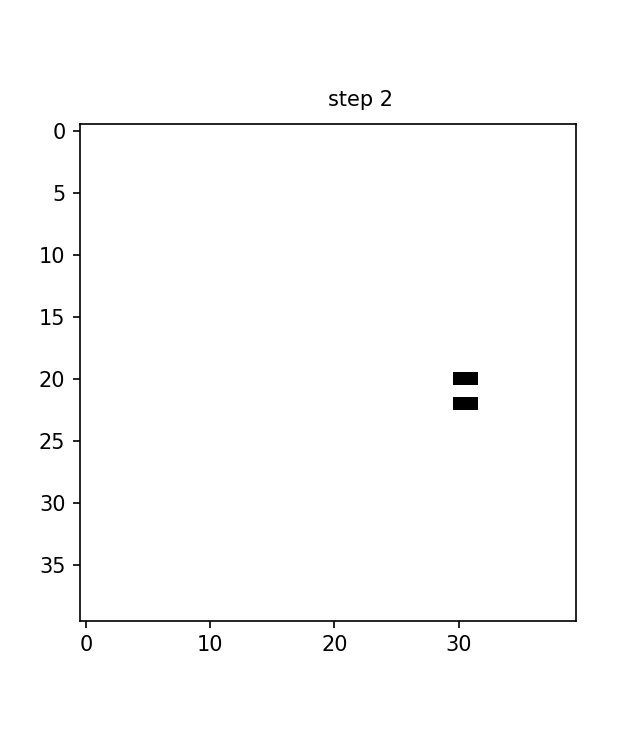

In [23]:
%matplotlib notebook

support = initialize_randomly(size, n_alive)
fig, ax = plt.subplots()
myobj = ax.imshow(support, cmap="Greys")
ttl = ax.text(.5, 1.05, 'init', transform = ax.transAxes, va='center')
              
def animate(i):
    support = myobj.get_array().data
    support = step(support)
    myobj.set_data(support)  # update the data
    ttl.set_text("step " + str(i))
    fig.savefig(os.path.join(output_folder, "step" + str(i) + ".png"))
    return myobj

# Init only required for blitting to give a clean slate.
def init():
    support = initialize_randomly(size, n_alive)
    myobj.set_data(support)
    fig.savefig(os.path.join(output_folder, "init.png"))
    return myobj

ani = animation.FuncAnimation(fig, 
                              animate, 
                              range(1, 3), 
                              init_func=init,
                              repeat=False,
                              interval=1000)
plt.show()
